# Access, Split and Load and Confirm images from local disk via python code

In [1]:
# creating a validation directory on local disk to implemennt code for spliting part of the training data set into validation data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [3]:
# import os
# import shutil
# from sklearn.model_selection import train_test_split

# def split_validation_data(train_dir, val_dir, val_split=0.2):
#     """
#     Splits a portion of the training data into a validation dataset.

#     Args:
#         train_dir (str): Path to the training dataset directory.
#         val_dir (str): Path to the validation dataset directory.
#         val_split (float): Fraction of training data to use for validation (default 0.2).
#     """
#     # Create validation directory if it doesn't exist
#     os.makedirs(val_dir, exist_ok=True)

#     # Iterate over each class (sub-folder) in the training directory
#     for class_name in os.listdir(train_dir):
#         class_train_dir = os.path.join(train_dir, class_name)
#         class_val_dir = os.path.join(val_dir, class_name)

#         # Skip if not a directory
#         if not os.path.isdir(class_train_dir):
#             continue

#         # Create class directory in validation directory
#         os.makedirs(class_val_dir, exist_ok=True)

#         # List all files in the current class directory
#         files = os.listdir(class_train_dir)

#         # Split files into training and validation subsets
#         train_files, val_files = train_test_split(files, test_size=val_split, random_state=42)

#         # Move validation files to the validation directory
#         for file_name in val_files:
#             src_path = os.path.join(class_train_dir, file_name)
#             dest_path = os.path.join(class_val_dir, file_name)
#             shutil.move(src_path, dest_path)

#         print(f"Moved {len(val_files)} files to {class_val_dir}")

# # Paths to your dataset directories
# train_dir = r"C:\Users\HP\Documents\ML, AI and DL\fruit_train_data"  # Replace with the path to your training dataset
# val_dir = r"C:\Users\HP\Documents\ML, AI and DL\fruit_validaton_data" # Replace with the path to your validation dataset

# # Split a portion of training data into validation data
# split_validation_data(train_dir, val_dir, val_split=0.2)


In [4]:
import os
import shutil
from sklearn.model_selection import train_test_split

def generate_validation_data(train_dir, val_dir, val_split=0.2):
    """
    Generates validation data by splitting a portion of the training data.

    Args:
        train_dir (str): Path to the training dataset directory.
        val_dir (str): Path to the validation dataset directory.
        val_split (float): Fraction of training data to use for validation (default 0.2).
    """
    # Create validation directory if it doesn't exist
    os.makedirs(val_dir, exist_ok=True)

    # Iterate over each class (sub-folder) in the training directory
    for class_name in os.listdir(train_dir):
        class_train_dir = os.path.join(train_dir, class_name)
        class_val_dir = os.path.join(val_dir, class_name)

        # Skip if not a directory
        if not os.path.isdir(class_train_dir):
            continue

        # Create class directory in validation directory
        os.makedirs(class_val_dir, exist_ok=True)

        # List all files in the current class directory
        files = os.listdir(class_train_dir)

        # Split files into training and validation subsets
        train_files, val_files = train_test_split(files, test_size=val_split, random_state=42)

        # Move validation files to the validation directory
        for file_name in val_files:
            src_path = os.path.join(class_train_dir, file_name)
            dest_path = os.path.join(class_val_dir, file_name)
            shutil.move(src_path, dest_path)

        print(f"Moved {len(val_files)} files to {class_val_dir}")

# Paths to your dataset directories
train_dir = r"C:\Users\HP\Documents\ML, AI and DL\fruit_train_data"  # Replace with the path to your training dataset
val_dir = r"C:\Users\HP\Documents\ML, AI and DL\fruit_validaton_data"  # Replace with the path to your validation dataset

# Check if validation folder exists
if os.path.exists(val_dir) and os.listdir(val_dir):
    print(f"Validation folder '{val_dir}' already exists. No action needed.")
else:
    print(f"Validation folder '{val_dir}' does not exist. Generating validation data...")
    generate_validation_data(train_dir, val_dir, val_split=0.2)


Validation folder 'C:\Users\HP\Documents\ML, AI and DL\fruit_validaton_data' already exists. No action needed.


# Load test images

In [5]:
# test file doesnt have a sub folder with class, so create subfolder for it and split data from validation to form test

In [6]:
import os
import random
import shutil

# Configuration
validation_data_dir = r"C:\Users\HP\Documents\ML, AI and DL\fruit_validaton_data"   # Path to your validation dataset
output_test_data_dir = r"C:\Users\HP\Documents\ML, AI and DL\fruit_test_data"   # Path where test data will be stored
test_data_ratio = 0.6  # Fraction of validation data to use for test data

# Function to create test data
def generate_test_data():
    if not os.path.exists(validation_data_dir):
        print(f"Validation data directory '{validation_data_dir}' does not exist.")
        return

    if os.path.exists(output_test_data_dir):
        print(f"Test data directory '{output_test_data_dir}' already exists. Skipping generation.")
        return

    # Create the test data directory
    os.makedirs(output_test_data_dir)

    # Collect all files from the validation dataset
    validation_files = []
    for root, _, files in os.walk(validation_data_dir):
        for file in files:
            validation_files.append(os.path.join(root, file))

    # Determine the number of test files
    test_file_count = int(len(validation_files) * test_data_ratio)

    # Randomly select files for the test dataset
    test_files = random.sample(validation_files, test_file_count)

    # Copy selected files to the test data directory
    for file_path in test_files:
        relative_path = os.path.relpath(file_path, validation_data_dir)
        destination_path = os.path.join(output_test_data_dir, relative_path)
        os.makedirs(os.path.dirname(destination_path), exist_ok=True)
        shutil.copy2(file_path, destination_path)

    print(f"Test dataset generated with {len(test_files)} files at '{output_test_data_dir}'.")

# Run the function
generate_test_data()


Test data directory 'C:\Users\HP\Documents\ML, AI and DL\fruit_test_data' already exists. Skipping generation.


In [7]:
data_train_path = r"C:\Users\HP\Documents\ML, AI and DL\fruit_train_data"
data_test_path = r"C:\Users\HP\Documents\ML, AI and DL\fruit_test_data"
data_validation_path = r"C:\Users\HP\Documents\ML, AI and DL\fruit_validaton_data"

In [8]:
img_width = 180
img_height =180 

In [9]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 13471 files belonging to 33 classes.


In [10]:
data_category = data_train.class_names

In [11]:
data_category

['Apple Braeburn',
 'Apple Granny Smith',
 'Apricot',
 'Avocado',
 'Banana',
 'Blueberry',
 'Cactus fruit',
 'Cantaloupe',
 'Cherry',
 'Clementine',
 'Corn',
 'Cucumber Ripe',
 'Grape Blue',
 'Kiwi',
 'Lemon',
 'Limes',
 'Mango',
 'Onion White',
 'Orange',
 'Papaya',
 'Passion Fruit',
 'Peach',
 'Pear',
 'Pepper Green',
 'Pepper Red',
 'Pineapple',
 'Plum',
 'Pomegranate',
 'Potato Red',
 'Raspberry',
 'Strawberry',
 'Tomato',
 'Watermelon']

In [12]:
data_val = tf.keras.utils.image_dataset_from_directory(data_validation_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 858 files belonging to 33 classes.


In [13]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path ,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 2525 files belonging to 33 classes.


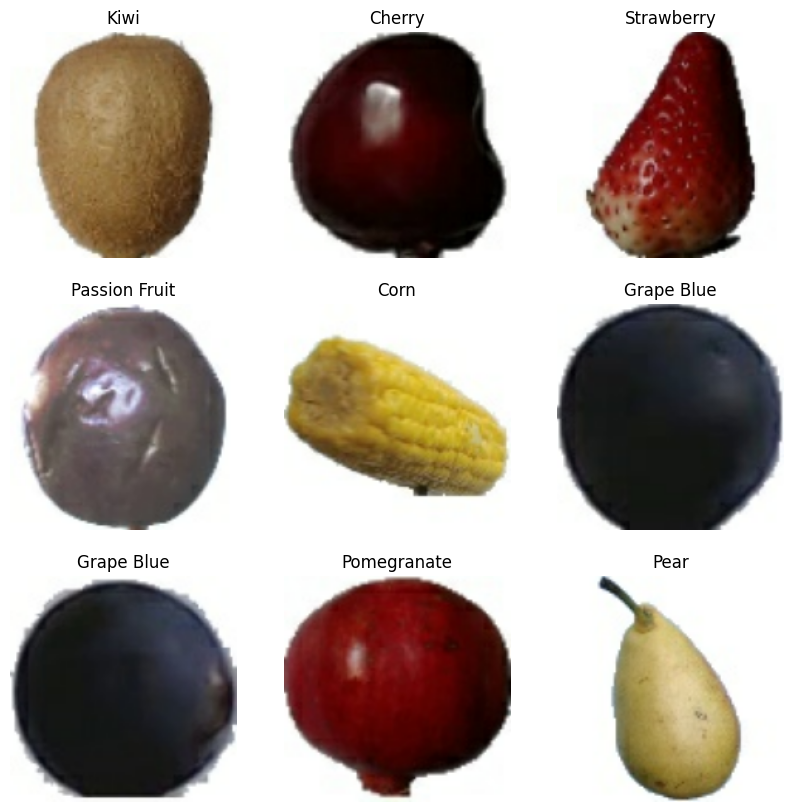

In [14]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_category[labels[i]])
        plt.axis('off')

In [15]:
from tensorflow.keras.models import Sequential

In [16]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [17]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_category))
                  
])

In [18]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [19]:
epochs_size = 10
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/10
421/421 ━━━━━━━━━━━━━━━━━━━━ 528s 1s/step - accuracy: 0.7575 - loss: 0.9701 - val_accuracy: 0.9988 - val_loss: 0.0038
Epoch 2/10
421/421 ━━━━━━━━━━━━━━━━━━━━ 503s 1s/step - accuracy: 1.0000 - loss: 8.1246e-04 - val_accuracy: 0.9988 - val_loss: 0.0015
Epoch 3/10
421/421 ━━━━━━━━━━━━━━━━━━━━ 504s 1s/step - accuracy: 1.0000 - loss: 1.0806e-04 - val_accuracy: 0.9988 - val_loss: 0.0012
Epoch 4/10
421/421 ━━━━━━━━━━━━━━━━━━━━ 533s 1s/step - accuracy: 1.0000 - loss: 5.0083e-05 - val_accuracy: 1.0000 - val_loss: 8.8235e-04
Epoch 5/10
421/421 ━━━━━━━━━━━━━━━━━━━━ 529s 1s/step - accuracy: 1.0000 - loss: 2.6031e-05 - val_accuracy: 1.0000 - val_loss: 8.2860e-04
Epoch 6/10
421/421 ━━━━━━━━━━━━━━━━━━━━ 526s 1s/step - accuracy: 1.0000 - loss: 1.8881e-05 - val_accuracy: 1.0000 - val_loss: 5.8772e-04
Epoch 7/10
421/421 ━━━━━━━━━━━━━━━━━━━━ 546s 1s/step - accuracy: 1.0000 - loss: 1.2231e-05 - val_accuracy: 1.0000 - val_loss: 5.5767e-04
Epoch 8/10
421/421 ━━━━━━━━━━━━━━━━━━━━ 531s 1s/step - ac

Text(0.5, 1.0, 'Loss')

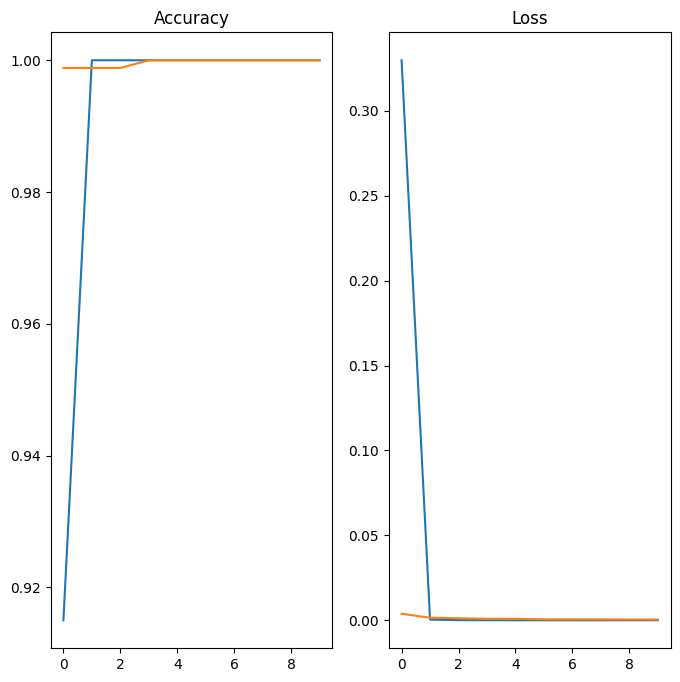

In [20]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [21]:
image = r"C:\Users\HP\Documents\ML, AI and DL\fruit_test_data\Apple Granny Smith\Apple Granny Smith_8.jpg"
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [22]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step


In [23]:
score = tf.nn.softmax(predict)

In [24]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_category[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is Apple Granny Smith with accuracy of 100.00
